In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
train = pd.read_csv('../Dataset/NB.csv')
train['Fault'] = 0

test = pd.read_csv('../Dataset/IR021.csv')
test['Fault'] = 1

In [3]:
dataset = train.append(test)
dataset

C:\Users\loaia\AppData\Local\Temp\ipykernel_13276\2349281889.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = train.append(test)


,DE,FE,Fault
0,0.046104,0.023216,0
1,-0.037134,0.081155,0
2,-0.089496,0.095331,0
3,-0.084906,0.091016,0
4,-0.038594,0.038625,0
...,...,...,...
485058,0.761238,0.220658,1
485059,0.627724,0.186758,1
485060,0.441639,0.174020,1
485061,0.228434,0.149982,1


In [4]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
y_train

90596     1
117259    1
149051    0
353737    1
441329    0
         ..
152315    0
479492    1
117952    0
435829    0
305711    0
Name: Fault, Length: 775172, dtype: int64

In [8]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [10]:
classifier.score(X_test, y_test)

0.8851512430725409

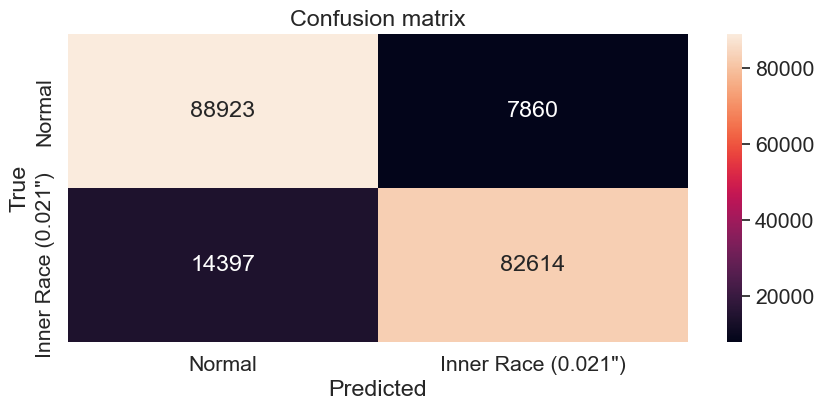

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal','Inner Race (0.021")']  
columns = ['Normal','Inner Race (0.021")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal','Inner Race (0.021")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.86      0.92      0.89     96783
Inner Race (0.021")       0.91      0.85      0.88     97011

           accuracy                           0.89    193794
          macro avg       0.89      0.89      0.89    193794
       weighted avg       0.89      0.89      0.89    193794



In [13]:
normal, IR = cm
anomalies = normal[1] + IR[0]
print("Anomalies: {}".format(anomalies))

Anomalies: 22257


0.9308609617603371


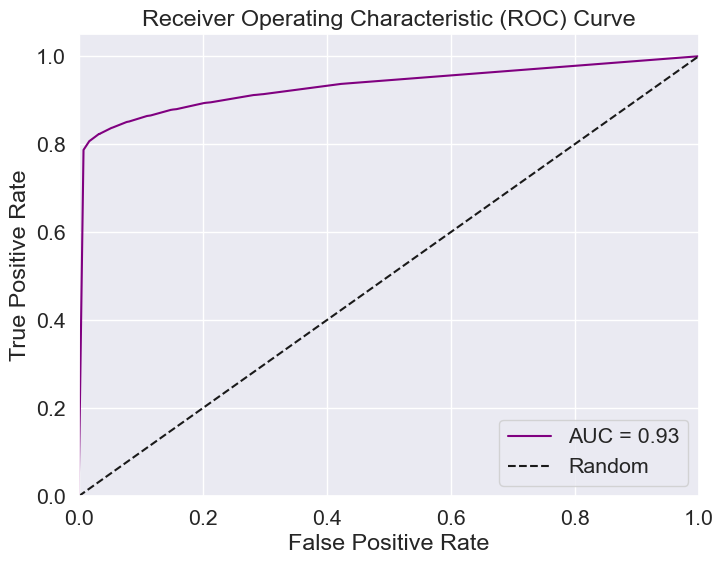

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Obtain predicted probabilities for the positive class
y_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
np.savez("roc_data_IR021.npz", fpr=fpr, tpr=tpr, thresholds=thresholds)
# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(auc_score)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()